In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [2]:
rfm = pd.read_csv("rfm.csv")
rfm = rfm.set_index("CustomerID")
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


In [3]:
rfm_cluster = rfm.iloc[:,0:3]
rfm_cluster

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [4]:
rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.995732,4.304065,7.472245
12350.0,5.739793,2.890372,5.815324
...,...,...,...
18280.0,5.631212,2.397895,5.201806
18281.0,5.204007,2.079442,4.404522
18282.0,2.197225,2.564949,5.187665


## 스케일 조정하기

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_cluster_log)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
rfm_norm = scaler.fit_transform(rfm_cluster_log)
rfm_norm

array([[ 1.46190736, -2.43788926,  3.71030846],
       [-2.0405272 ,  1.18891259,  1.41710205],
       [ 0.37248773, -0.211389  ,  0.72210361],
       ...,
       [-1.22033272, -0.93475683, -1.11156693],
       [-1.65915848,  2.2911166 ,  0.82490915],
       [-0.03554715,  0.42858907,  0.73960806]])

In [7]:
from sklearn.cluster import KMeans
# Within-Cluster Sum of Square
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    # rfm_norm 값을 학습하고
    # 리스트에 inertia_ 값을 넣어 elbow 값을 봅니다.
    kmeans.fit(rfm_norm)
    inertia.append(kmeans.inertia_)

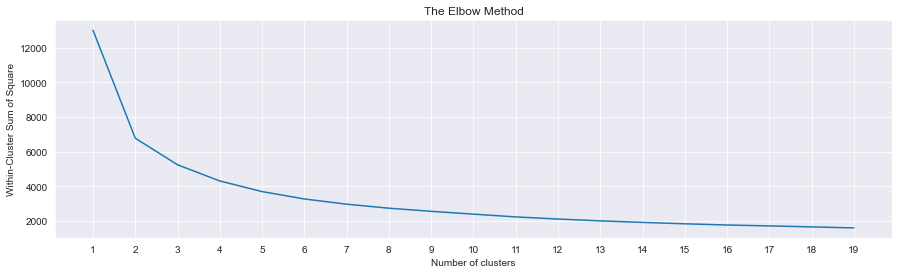

In [8]:
plt.figure(figsize=(15,4))
plt.plot(range(1, 20), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[-0.82827734, -0.27764174, -0.35994432],
       [ 0.8363566 , -1.36386766, -1.22087157],
       [-1.35975328,  1.33399036,  1.38858251],
       [ 0.82315716, -0.278734  , -0.31524398],
       [-0.00989844,  0.66597072,  0.62458511]])

In [11]:
kmeans.labels_

array([3, 2, 4, ..., 0, 2, 4], dtype=int32)

In [12]:
rfm['Cluster'] = kmeans.labels_
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver,3
12347.0,2,182,4310.00,5,5,5,555,15,platinum,2
12348.0,75,31,1797.24,2,3,4,234,9,gold,4
12349.0,19,73,1757.55,4,4,4,444,12,platinum,4
12350.0,310,17,334.40,1,2,2,122,5,silver,3
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver,1
18281.0,181,7,80.82,1,1,1,111,3,silver,1
18282.0,8,12,178.05,5,1,1,511,7,silver,0


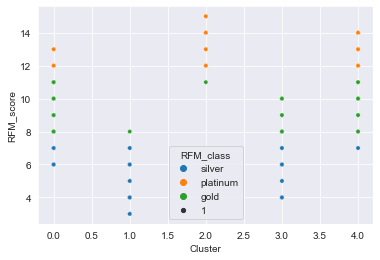

In [13]:
sns.scatterplot(data=rfm, x="Cluster", y="RFM_score", hue="RFM_class", size=1)

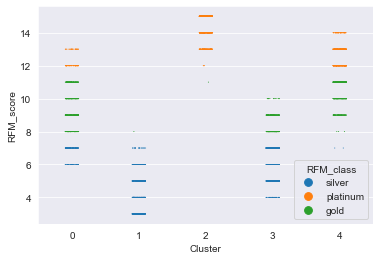

In [14]:
sns.stripplot(data=rfm, x="Cluster", y="RFM_score", hue="RFM_class", size=1)

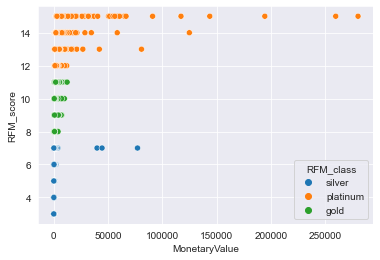

In [17]:
sns.scatterplot(data=rfm, x="MonetaryValue", y="RFM_score", hue="RFM_class")

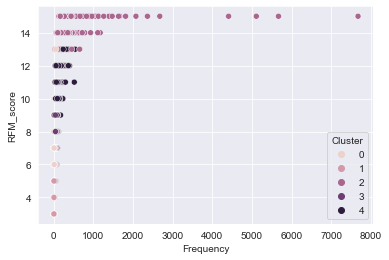

In [16]:
sns.scatterplot(data=rfm, x="Frequency", y="RFM_score", hue="Cluster")

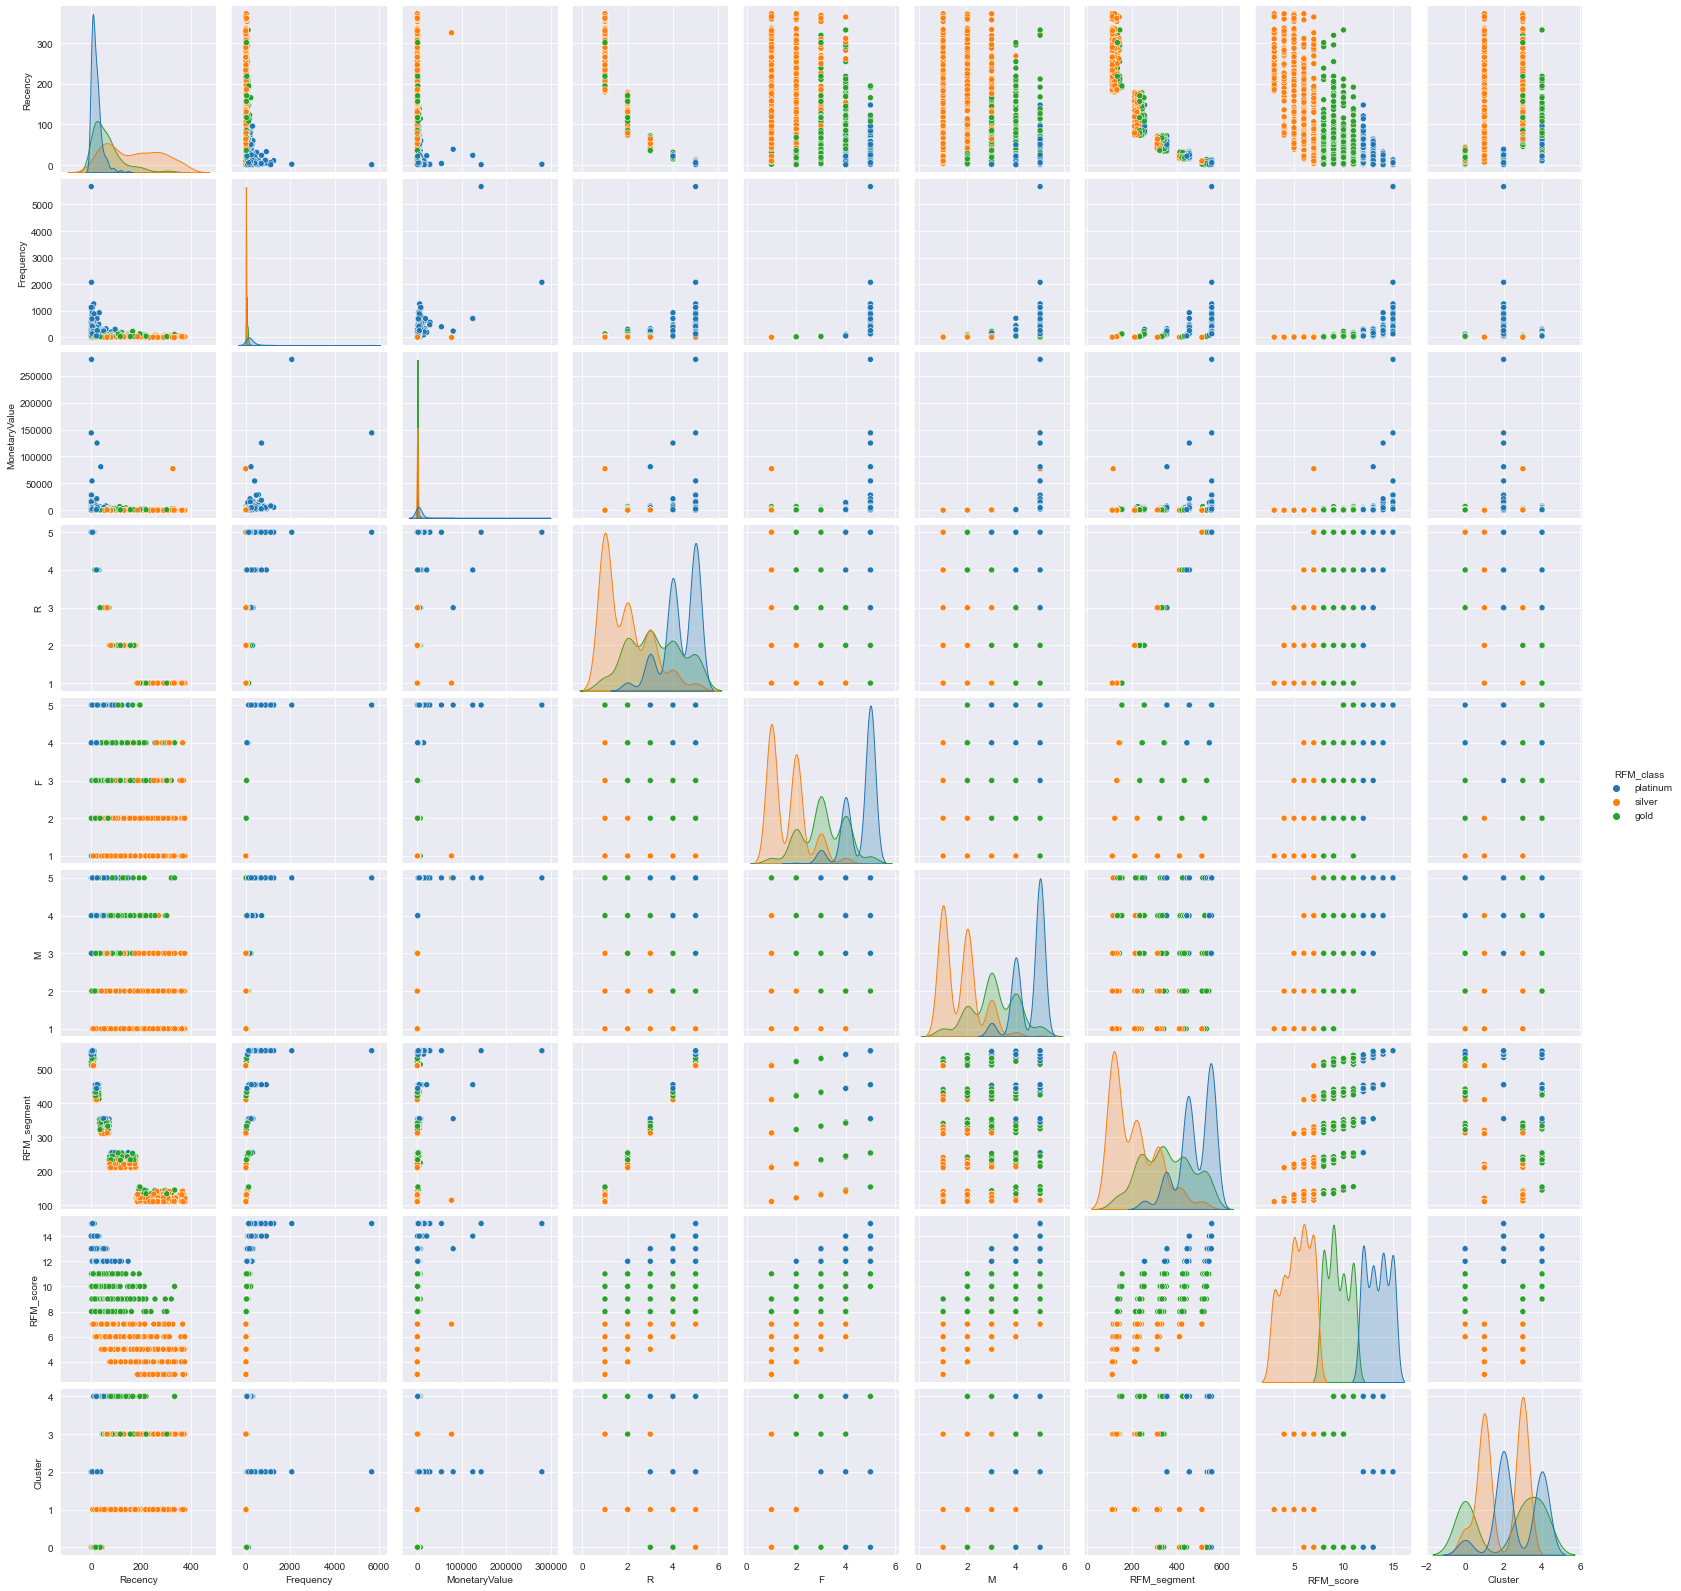

In [20]:
sns.pairplot(data=rfm.sample(1000), hue="RFM_class")